# EDA Project: King County Housing Data

### Statistical analysis for my client Erin Robinson
- She is a Buyer
- Invest in poor neighborhood
- Costs back + little profit 
- Socially responsible                           

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import statsmodels as sm
import scipy.stats as sts

from matplotlib.ticker import PercentFormatter

pd.set_option('display.float_format', lambda x: '%g' % x)

sns.set_style('darkgrid')

## Reading and exploring the data

In [2]:
#importing the data from a csv-file
df = pd.read_csv('data/eda.csv')
df.head()

date  price    house_id  id        id.1  bedrooms  bathrooms  \
0  2014-10-13 221900  7129300520   1  7129300520         3          1   
1  2014-12-09 538000  6414100192   2  6414100192         3       2.25   
2  2015-02-25 180000  5631500400   3  5631500400         2          1   
3  2014-12-09 604000  2487200875   4  2487200875         4          3   
4  2015-02-18 510000  1954400510   5  1954400510         3          2   

   sqft_living  sqft_lot  floors  ...  grade  sqft_above  sqft_basement  \
0         1180      5650       1  ...      7        1180              0   
1         2570      7242       2  ...      7        2170            400   
2          770     10000       1  ...      6         770              0   
3         1960      5000       1  ...      7        1050            910   
4         1680      8080       1  ...      8        1680              0   

   yr_built  yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.5112 -122.257           1340        5650  
1      1951         19910    98125  47.721 -122.319           1690        7639  
2      1933           NaN    98028 47.7379 -122.233           2720        8062  
3      1965             0    98136 47.5208 -122.393           1360        5000  
4      1987             0    98074 47.6168 -122.045           1800        7503  

[5 rows x 23 columns]

In [3]:
# exploring the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [4]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe().round(2)

price    house_id      id        id.1  bedrooms  bathrooms  \
count   21597       21597   21597       21597     21597      21597   
mean   540297 4.58047e+09   10799 4.58047e+09      3.37       2.12   
std    367368 2.87674e+09 6234.66 2.87674e+09      0.93       0.77   
min     78000  1.0001e+06       1  1.0001e+06         1        0.5   
25%    322000 2.12305e+09    5400 2.12305e+09         3       1.75   
50%    450000 3.90493e+09   10799 3.90493e+09         3       2.25   
75%    645000  7.3089e+09   16198  7.3089e+09         4        2.5   
max   7.7e+06     9.9e+09   21597     9.9e+09        33          8   

       sqft_living    sqft_lot  floors  waterfront  ...  grade  sqft_above  \
count        21597       21597   21597       19206  ...  21597       21597   
mean       2080.32     15099.4    1.49        0.01  ...   7.66      1788.6   
std         918.11     41412.6    0.54        0.09  ...   1.17      827.76   
min            370         520       1           0  ...      3         370   
25%           1430        5040       1           0  ...      7        1190   
50%           1910        7618     1.5           0  ...      7        1560   
75%           2550       10685       2           0  ...      8        2210   
max          13540 1.65136e+06     3.5           1  ...     13        9410   

       sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
count          21145     21597         17749    21597 21597   21597   
mean          291.86      1971        836.65  98077.9 47.56 -122.21   
std           442.49     29.38       4000.11    53.51  0.14    0.14   
min                0      1900             0    98001 47.16 -122.52   
25%                0      1951             0    98033 47.47 -122.33   
50%                0      1975             0    98065 47.57 -122.23   
75%              560      1997             0    98118 47.68 -122.12   
max             4820      2015         20150    98199 47.78 -121.32   

       sqft_living15  sqft_lot15  
count          21597       21597  
mean         1986.62     12758.3  
std           685.23     27274.4  
min              399         651  
25%             1490        5100  
50%             1840        7620  
75%             2360       10083  
max             6210      871200  

[8 rows x 22 columns]

### First impressions of the data

Data looks fine, meanning there are no big discrepancies.
- The format of the columns names is  correct
- Only 4 columns out of 23 has Null values
- The datatype of some columns need to be changed


## Exploring and cleaning the Data

##### Dropping extra 'id' columns and rearranging the order

In [6]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.drop(['house_id', 'id.1'], axis=1, inplace=True)                                     # dropping unwanted columns
                                
df.rename(columns={'id' : 'house_id'}, inplace=True)                                    # renaming the 'id' column for 'house_id'

df = df[['house_id', 'date', 'price', 'bedrooms', 'bathrooms',                          # reordering the columns, so 'house_id' comes first
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

df.head(1)

house_id        date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         1  2014-10-13 221900         3          1         1180      5650   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0       1         NaN     0  ...      7        1180              0      1955   

   yr_renovated  zipcode     lat     long  sqft_living15  sqft_lot15  
0             0    98178 47.5112 -122.257           1340        5650  

[1 rows x 21 columns]

##### Checking for duplicated rows

In [8]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

##### Adjusting datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Lets start changing the 'date' column datatype into datetime and extracting some elements
to create new columns

In [10]:
# converting into datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [11]:
# Extracting year, month and day in order to create new columns, incl. day of the week
df['year_sale'] = df['date'].dt.year
df['month_sale'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name().str[:3]
df['day_sale'] = df['date'].dt.day
df['weekd_sale'] = df['date'].dt.day_of_week

# deleting 'date' column
#df.drop('date', axis=1, inplace=True)

Stripping trailling '0'

In [12]:
df['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [13]:
# Converting to int and deleting trailling 0
df['yr_renovated'] = df['yr_renovated'].astype('Int64').astype(str).str[:-1].astype('Int64', errors='ignore') 

In [14]:
df['yr_renovated'].unique()

array(['', '1991', '<NA', '2002', '2010', '1992', '2013', '1994', '1978',
       '2005', '2003', '1984', '1954', '2014', '2011', '1983', '1945',
       '1990', '1988', '1977', '1981', '1995', '2000', '1999', '1998',
       '1970', '1989', '2004', '1986', '2007', '1987', '2006', '1985',
       '2001', '1980', '1971', '1979', '1997', '1950', '1969', '1948',
       '2009', '2015', '1974', '2008', '1968', '2012', '1963', '1951',
       '1962', '1953', '1993', '1996', '1955', '1982', '1956', '1940',
       '1976', '1946', '1975', '1964', '1973', '1957', '1959', '1960',
       '1967', '1965', '1934', '1972', '1944', '1958'], dtype=object)

In [15]:
df['yr_built'] = pd.to_datetime(df['yr_built'].astype('Int32'), format='%Y').dt.year    #to int32
df['yr_renovated'] = pd.to_datetime(df['yr_renovated'], format='%Y', errors='coerce').dt.year 

# Because there are missing values in the column 'yr_renovated', is not yet possible to convert it into int
# This will be done in a later step 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     19206 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21145 non-null  float64       
 14  yr_built       21597 non-null  int32         
 15  yr_renovated   744 

In [17]:
df.head()

house_id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         1 2014-10-13 221900         3          1         1180      5650   
1         2 2014-12-09 538000         3       2.25         2570      7242   
2         3 2015-02-25 180000         2          1          770     10000   
3         4 2014-12-09 604000         4          3         1960      5000   
4         5 2015-02-18 510000         3          2         1680      8080   

   floors  waterfront  view  ...  zipcode     lat     long  sqft_living15  \
0       1         NaN     0  ...    98178 47.5112 -122.257           1340   
1       2           0     0  ...    98125  47.721 -122.319           1690   
2       1           0     0  ...    98028 47.7379 -122.233           2720   
3       1           0     0  ...    98136 47.5208 -122.393           1360   
4       1           0     0  ...    98074 47.6168 -122.045           1800   

   sqft_lot15  year_sale  month_sale  month_name  day_sale  weekd_sale  
0        5650       2014          10         Oct        13           0  
1        7639       2014          12         Dec         9           1  
2        8062       2015           2         Feb        25           2  
3        5000       2014          12         Dec         9           1  
4        7503       2015           2         Feb        18           2  

[5 rows x 26 columns]

## Descriptic statistics

#### Checking for null values

In [18]:
df.isna().sum()

house_id             0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront        2391
view                63
condition            0
grade                0
sqft_above           0
sqft_basement      452
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
year_sale            0
month_sale           0
month_name           0
day_sale             0
weekd_sale           0
dtype: int64

#### Checking for unique values on the columns with null values

In [19]:
print(f"'waterfront' unique values = {df['waterfront'].unique()}")
print('-' * 20)
print(f"'view' unique values = {df['view'].unique()}")
print('-' * 20)
print(f"'yr_renovated' unique values = {df['yr_renovated'].unique()}")
print('-' * 20)
print(f"'yr_built' unique values = {df['yr_built'].unique()}")

'waterfront' unique values = [nan  0.  1.]
--------------------
'view' unique values = [ 0. nan  3.  4.  2.  1.]
--------------------
'yr_renovated' unique values = [  nan 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
--------------------
'yr_built' unique values = [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990

I will treat the entries of the previous columns with NaN or '0' as None. Therefore, I'm filling all NaN entries with '0' and convert them to int datatype

In [20]:
# Filling NaN with 0
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['yr_renovated'].fillna(0, inplace=True)

# Converting from float to int
df['waterfront'] = df['waterfront'].astype(int)
df['view'] = df['view'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)

#### Checking stadistics and correlations

In [21]:
df.columns

Index(['house_id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale',
       'month_name', 'day_sale', 'weekd_sale'],
      dtype='object')

In [22]:
print('Stadistics on dataset selection:')

df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].describe()

Stadistics on dataset selection:


price  bedrooms  bathrooms  sqft_living    sqft_lot   floors  \
count   21597     21597      21597        21597       21597    21597   
mean   540297    3.3732    2.11583      2080.32     15099.4   1.4941   
std    367368  0.926299   0.768984      918.106     41412.6 0.539683   
min     78000         1        0.5          370         520        1   
25%    322000         3       1.75         1430        5040        1   
50%    450000         3       2.25         1910        7618      1.5   
75%    645000         4        2.5         2550       10685        2   
max   7.7e+06        33          8        13540 1.65136e+06      3.5   

       condition   grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  
count      21597   21597       21597          21145          21597       21597  
mean     3.40983 7.65792      1788.6        291.857        1986.62     12758.3  
std     0.650546  1.1732      827.76        442.491         685.23     27274.4  
min            1       3         370              0            399         651  
25%            3       7        1190              0           1490        5100  
50%            3       7        1560              0           1840        7620  
75%            4       8        2210            560           2360       10083  
max            5      13        9410           4820           6210      871200

In [23]:
print('Correlations on dataset selection:')

df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']].corr().round(2)

Correlations on dataset selection:


price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price              1      0.31       0.53          0.7      0.09    0.26   
bedrooms        0.31         1       0.51         0.58      0.03    0.18   
bathrooms       0.53      0.51          1         0.76      0.09     0.5   
sqft_living      0.7      0.58       0.76            1      0.17    0.35   
sqft_lot        0.09      0.03       0.09         0.17         1      -0   
floors          0.26      0.18        0.5         0.35        -0       1   
waterfront      0.26        -0       0.06          0.1      0.02    0.02   
view            0.39      0.08       0.19         0.28      0.08    0.03   
condition       0.04      0.03      -0.13        -0.06     -0.01   -0.26   
grade           0.67      0.36       0.67         0.76      0.11    0.46   
sqft_above      0.61      0.48       0.69         0.88      0.18    0.52   
sqft_basement   0.32       0.3       0.28         0.43      0.02   -0.25   
yr_built        0.05      0.16       0.51         0.32      0.05    0.49   
sqft_living15   0.59      0.39       0.57         0.76      0.14    0.28   
sqft_lot15      0.08      0.03       0.09         0.18      0.72   -0.01   
lat             0.31     -0.01       0.02         0.05     -0.09    0.05   
long            0.02      0.13       0.22         0.24      0.23    0.13   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
price                0.26  0.39       0.04   0.67        0.61           0.32   
bedrooms               -0  0.08       0.03   0.36        0.48            0.3   
bathrooms            0.06  0.19      -0.13   0.67        0.69           0.28   
sqft_living           0.1  0.28      -0.06   0.76        0.88           0.43   
sqft_lot             0.02  0.08      -0.01   0.11        0.18           0.02   
floors               0.02  0.03      -0.26   0.46        0.52          -0.25   
waterfront              1  0.38       0.02   0.08        0.07           0.08   
view                 0.38     1       0.05   0.25        0.17           0.28   
condition            0.02  0.05          1  -0.15       -0.16           0.17   
grade                0.08  0.25      -0.15      1        0.76           0.17   
sqft_above           0.07  0.17      -0.16   0.76           1          -0.05   
sqft_basement        0.08  0.28       0.17   0.17       -0.05              1   
yr_built            -0.02 -0.05      -0.36   0.45        0.42          -0.13   
sqft_living15        0.08  0.28      -0.09   0.71        0.73            0.2   
sqft_lot15           0.03  0.07         -0   0.12         0.2           0.02   
lat                 -0.01  0.01      -0.02   0.11          -0           0.11   
long                -0.04 -0.08      -0.11    0.2        0.34          -0.15   

               yr_built  sqft_living15  sqft_lot15   lat  long  
price              0.05           0.59        0.08  0.31  0.02  
bedrooms           0.16           0.39        0.03 -0.01  0.13  
bathrooms          0.51           0.57        0.09  0.02  0.22  
sqft_living        0.32           0.76        0.18  0.05  0.24  
sqft_lot           0.05           0.14        0.72 -0.09  0.23  
floors             0.49           0.28       -0.01  0.05  0.13  
waterfront        -0.02           0.08        0.03 -0.01 -0.04  
view              -0.05           0.28        0.07  0.01 -0.08  
condition         -0.36          -0.09          -0 -0.02 -0.11  
grade              0.45           0.71        0.12  0.11   0.2  
sqft_above         0.42           0.73         0.2    -0  0.34  
sqft_basement     -0.13            0.2        0.02  0.11 -0.15  
yr_built              1           0.33        0.07 -0.15  0.41  
sqft_living15      0.33              1        0.18  0.05  0.34  
sqft_lot15         0.07           0.18           1 -0.09  0.26  
lat               -0.15           0.05       -0.09     1 -0.14  
long               0.41           0.34        0.26 -0.14     1

- There are too many '0' values in the 'sqft_basement' column, this is messing with the data in the describe method.

In [24]:
# Entries with real values
print('Number of entries per column with real values: ')
print('-' * 20)
print(df.query('sqft_basement != 0').count())

Number of entries per column with real values: 
--------------------
house_id         8770
date             8770
price            8770
bedrooms         8770
bathrooms        8770
sqft_living      8770
sqft_lot         8770
floors           8770
waterfront       8770
view             8770
condition        8770
grade            8770
sqft_above       8770
sqft_basement    8318
yr_built         8770
yr_renovated     8770
zipcode          8770
lat              8770
long             8770
sqft_living15    8770
sqft_lot15       8770
year_sale        8770
month_sale       8770
month_name       8770
day_sale         8770
weekd_sale       8770
dtype: int64


In [25]:
# Entries with '0' values
print('Number of entries per column with "0" values: ')
print('-' * 20)
print(df.query('sqft_basement == 0').count())

Number of entries per column with "0" values: 
--------------------
house_id         12827
date             12827
price            12827
bedrooms         12827
bathrooms        12827
sqft_living      12827
sqft_lot         12827
floors           12827
waterfront       12827
view             12827
condition        12827
grade            12827
sqft_above       12827
sqft_basement    12827
yr_built         12827
yr_renovated     12827
zipcode          12827
lat              12827
long             12827
sqft_living15    12827
sqft_lot15       12827
year_sale        12827
month_sale       12827
month_name       12827
day_sale         12827
weekd_sale       12827
dtype: int64


I will treat the entries of the column 'sqft_basement' with NaN or '0' as if there is no basement. Therefore, I'm filling all NaN entries with '0'.

In [26]:
# Filling NaN with 0
df['sqft_basement'].fillna(0, inplace=True)

# Converting from float to int
df['sqft_basement'] = df['sqft_basement'].astype(int)

#### Checking for outliers

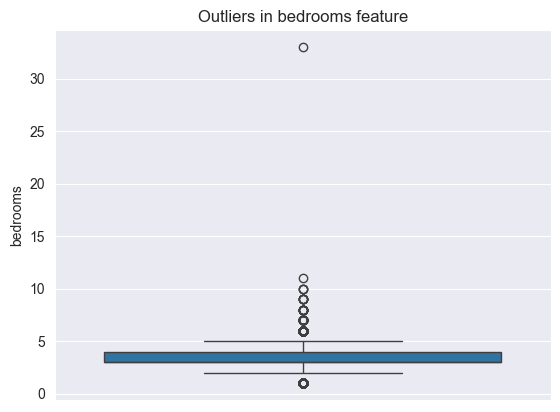

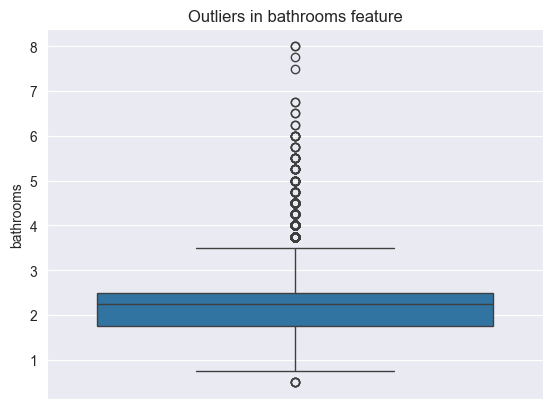

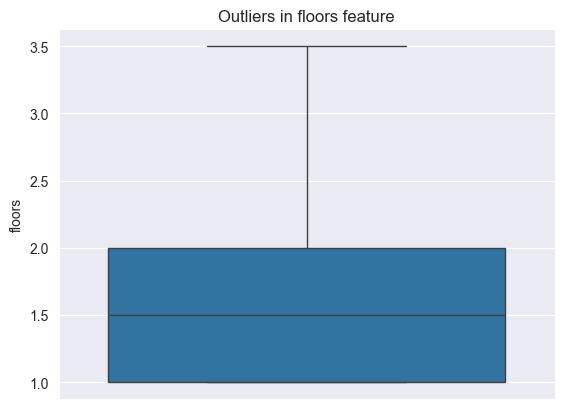

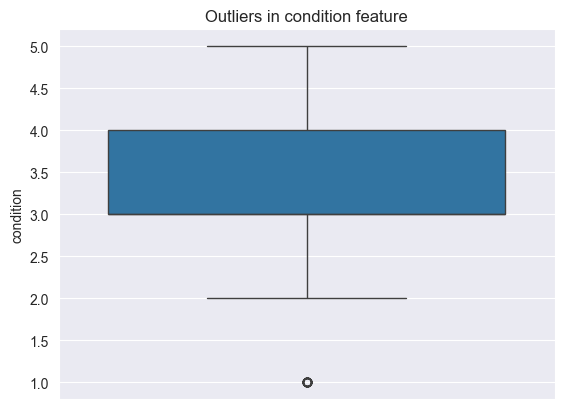

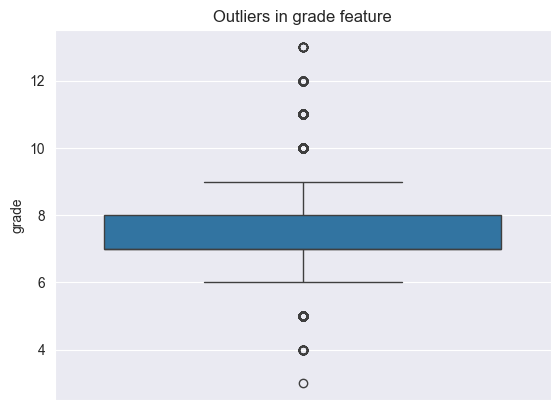

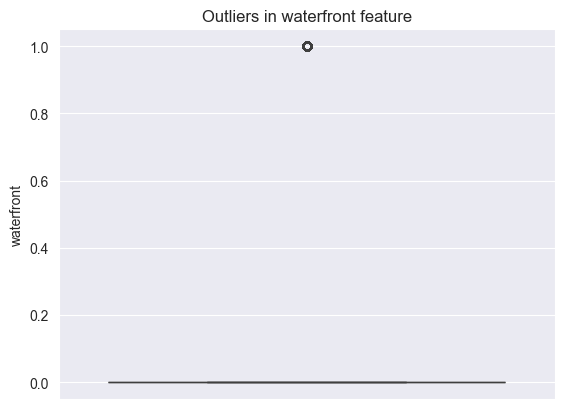

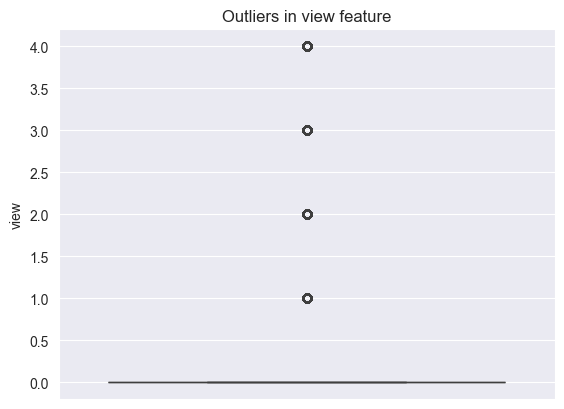

In [27]:
cols = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront', 'view',]

for c in cols:
    sns.boxplot(df[c])
    plt.title(f'Outliers in {c} feature')
    plt.show()

In [28]:
df2 = df.copy()

In order to get rid of the most evident outliers, I'll loop through those columns and  I'll drop the rows where the value frequency is less than 10

In [29]:

count = 0

# looping hrough selected columns
for c in cols:
      #print(' ')
      print(c)
      print('-' * 100)

      # Looping throuhg items to get the columns value and it's frecuency
      # based on a condition
      for i, v in df[c].value_counts().items():
            if v <= 10:

                  # Summing up the values to get a total
                  count += v
                  print(f'Value : {i}, Frec. : {v}')
                  print(f'Index in Dataframe: {df[df[c] == i].index}\n')
                  
                  # Dropping the rows
                  df.drop(df[df[c] == i ].index, inplace=True)
                  
print(' ')
print(f'Number of houses to discard: {count}\nThat would be the {np.round((count * 100) / df2["house_id"].count(), decimals=2)}% of the total.' )


bedrooms
----------------------------------------------------------------------------------------------------
Value : 9.0, Frec. : 6
Index in Dataframe: Index([4092, 4231, 6073, 8537, 16830, 18428], dtype='int64')

Value : 10.0, Frec. : 3
Index in Dataframe: Index([13301, 15147, 19239], dtype='int64')

Value : 11.0, Frec. : 1
Index in Dataframe: Index([8748], dtype='int64')

Value : 33.0, Frec. : 1
Index in Dataframe: Index([15856], dtype='int64')

bathrooms
----------------------------------------------------------------------------------------------------
Value : 5.5, Frec. : 10
Index in Dataframe: Index([2624, 3018, 3098, 4145, 7028, 10362, 13894, 18960, 20217, 20436], dtype='int64')

Value : 1.25, Frec. : 9
Index in Dataframe: Index([971, 1676, 3728, 8438, 16826, 18640, 20685, 21049, 21536], dtype='int64')

Value : 6.0, Frec. : 6
Index in Dataframe: Index([1313, 4031, 12358, 19133, 21034, 21328], dtype='int64')

Value : 0.5, Frec. : 4
Index in Dataframe: Index([2259, 10413, 11662, 

In [30]:
df["house_id"].count()

21529

In [31]:
# Saving cleaned data to .csv
df.to_csv('data/df_clean.csv', index=False)  

## Plotting stats

In [32]:
#Creating dataset per year
df_2014 = df[df['year_sale'] == 2014] 
df_2015 = df[df['year_sale'] == 2015]

In [33]:
fig = px.scatter(df, x='sqft_living', y='price', trendline="ols", 
                trendline_color_override='silver', facet_row='year_sale', template='seaborn')
fig.update_layout(title='Price vs sqft 2014 and 2015', xaxis_title_text='Square Feet')

fig.show()


### Checking the number of available housing

In [34]:

fig = px.histogram(df_2014, x='month_name',
              template='seaborn')
fig.update_layout(bargap=0.2, title='Number of available housing per month in 2014', xaxis_title_text='Months')


fig.show()

In [35]:
fig = px.histogram(df_2015, x='month_name', template='seaborn')
fig.update_layout(bargap=0.2, title='Number of available housing per month in 2015', xaxis_title_text='Months')


fig.show()

### Checking prices development over months

In [36]:
# Grouping datasets by month and calculating the price average per month
group_2014 = df_2014.groupby(['month_sale'])['price'].mean().reset_index()
group_2015 = df_2015.groupby(['month_sale'])['price'].mean().reset_index()

In [37]:

fig = px.histogram(group_2014, x='month_sale', y='price', histfunc='avg',  nbins= 9, title='Price evolution in avg 2014')
fig.update_layout(bargap=0.2, xaxis_title_text='Months')
fig.update_xaxes(labelalias={5:'May',
                             6:'June',
                             7:'July',
                             8 :'Aug',
                             9:'Sep',
                             10 :'Oct',
                             11:'Nov',
                             12:'Dec'})

fig.show()

In [38]:
fig = px.histogram(group_2015, x='month_sale', y='price', histfunc='avg',  nbins= 5, title='Price evolution in avg 2015')
fig.update_layout(bargap=0.2, xaxis_title_text='Months')
fig.update_xaxes(labelalias={1:'Jan',
                             2:'Feb',
                             3:'March',
                             4:'April',
                             5:'May',})

fig.show()

Whereas in 2014 there is a small decrease in prices, in 2015 seems to be a tendency to an increase.

Now I will filter by price quantilles, so I can select the most economic values for my client, and use this filters for future clients with other budgets or requirements

In [39]:
df.describe()

house_id                           date    price  bedrooms  bathrooms  \
count     21529                          21529    21529     21529      21529   
mean    10795.6  2014-10-29 05:04:56.140090368   536178   3.36681     2.1095   
min           1            2014-05-02 00:00:00    78000         1       0.75   
25%        5399            2014-07-22 00:00:00   321000         3       1.75   
50%       10796            2014-10-16 00:00:00   450000         3       2.25   
75%       16193            2015-02-17 00:00:00   642000         4        2.5   
max       21597            2015-05-27 00:00:00 7.06e+06         8       5.25   
std     6233.39                            NaN   348159  0.890156   0.752357   

       sqft_living    sqft_lot   floors  waterfront     view  ...  \
count        21529       21529    21529       21529    21529  ...   
mean       2071.47     15001.1  1.49241  0.00659575 0.230805  ...   
min            370         520        1           0        0  ...   
25%           1420        5040        1           0        0  ...   
50%           1910        7615      1.5           0        0  ...   
75%           2550       10650        2           0        0  ...   
max          10040 1.65136e+06        3           1        4  ...   
std        890.357     40888.8 0.538253   0.0809479 0.760109  ...   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
count         21529    21529    21529    21529          21529       21529   
mean        68.3259  98077.9  47.5599 -122.214        1984.34     12693.4   
min               0    98001  47.1559 -122.519            399         651   
25%               0    98033  47.4704 -122.328           1490        5100   
50%               0    98065  47.5717  -122.23           1840        7620   
75%               0    98118  47.6781 -122.125           2360       10080   
max            2015    98199  47.7776 -121.315           6210      871200   
std         362.931  53.5119 0.138644  0.14074         681.42     26601.2   

       year_sale  month_sale  day_sale  weekd_sale  
count      21529       21529     21529       21529  
mean     2014.32     6.57378   15.6908     2.01017  
min         2014           1         1           0  
25%         2014           4         8           1  
50%         2014           6        16           2  
75%         2015           9        23           3  
max         2015          12        31           6  
std     0.467653     3.11491   8.63526     1.46066  

[8 rows x 25 columns]

### Checking prices development over months using filtered datasets

In [40]:
# Creating three diferent filters for diferent client's requirements
df_low = df.query('price <= price.quantile(0.25)')
df_med = df.query('price <= price.quantile(0.75) and price >= price.quantile(0.25)')
df_high = df.query('price > price.quantile(0.75)')

In [41]:
# Grouping datasets by month and calculating the price average per month
group_low_2014 = df_low[df_low['year_sale'] == 2014].groupby(['month_sale'])['price'].mean().reset_index()
group_low_2015 = df_low[df_low['year_sale'] == 2015].groupby(['month_sale'])['price'].mean().reset_index()
group_med_2014 = df_med[df_med['year_sale'] == 2014].groupby(['month_sale'])['price'].mean().reset_index()
group_med_2015 = df_med[df_med['year_sale'] == 2015].groupby(['month_sale'])['price'].mean().reset_index()
group_high_2014 = df_high[df_high['year_sale'] == 2014].groupby(['month_sale'])['price'].mean().reset_index()
group_high_2015 = df_high[df_high['year_sale'] == 2015].groupby(['month_sale'])['price'].mean().reset_index()


In [42]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(
        go.Scatter(name='Lower prices', x=group_low_2014['month_sale'], y=group_low_2014['price']),
        row=1, col=1
)
fig.add_trace(
        go.Scatter(name='Medium prices', x=group_med_2014['month_sale'], y=group_med_2014['price']),
        row=2, col=1
)
fig.add_trace(
        go.Scatter(name='Higher prices', x=group_high_2014['month_sale'], y=group_high_2014['price']),
        row=3, col=1
)
fig.update_layout(title='Price evolution over months in 2014', height=1200)
fig.update_xaxes(labelalias={
                             1:'Jan',
                             1.5:'',
                             2:'Feb',
                             2.5:'',
                             3:'March',
                             3.5:'',
                             4:'April',
                             4.5:'',
                             5:'May',
                             6:'June',
                             7:'July',
                             8 :'Aug',
                             9:'Sep',
                             10 :'Oct',
                             11:'Nov',
                             12:'Dec',
                             })
fig.show()

In [43]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(
        go.Scatter(name='Lower prices', x=group_low_2015['month_sale'], y=group_low_2015['price']),
        row=1, col=1
)
fig.add_trace(
        go.Scatter(name='Medium prices', x=group_med_2015['month_sale'], y=group_med_2015['price']),
        row=2, col=1
)
fig.add_trace(
        go.Scatter(name='Higher prices', x=group_high_2015['month_sale'], y=group_high_2015['price']),
        row=3, col=1
)
fig.update_layout(title='Price evolution over months in 2015', height=1200)
fig.update_xaxes(labelalias={
                             1:'Jan',
                             1.5:'',
                             2:'Feb',
                             2.5:'',
                             3:'March',
                             3.5:'',
                             4:'April',
                             4.5:'',
                             5:'May',
                             6:'June',
                             7:'July',
                             8 :'Aug',
                             9:'Sep',
                             10 :'Oct',
                             11:'Nov',
                             12:'Dec',
                             })
fig.show()

After this filtering, we can see that the overall decrease in prices in 2014 was noticeable by the houses in the middle range prices, whereas the lower range actuelly were increasing.  

Higher range houses also show a tendency to decrease in prices.

In 2015, we saw in the overall graph that the prices were increasing, but this is due the influence of the higher price range houses, which are the ones increasing in price. Low and medium houses are decreasing after a spike in April.

#### Now let's pay attention to the lower prices ones.

In [44]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
        go.Scatter(name='2014', x=group_low_2014['month_sale'], y=group_low_2014['price']),
        row=1, col=1
)
fig.add_trace(
        go.Scatter(name='2015', x=group_low_2015['month_sale'], y=group_low_2015['price']),
        row=2, col=1
)
fig.update_layout(title='Price evolution over months 2014', height=800, width=800,)
fig.update_xaxes(labelalias={
                             1:'Jan',
                             1.5:'',
                             2:'Feb',
                             2.5:'',
                             3:'March',
                             3.5:'',
                             4:'April',
                             4.5:'',
                             5:'May',
                             6:'June',
                             7:'July',
                             8 :'Aug',
                             9:'Sep',
                             10 :'Oct',
                             11:'Nov',
                             12:'Dec',
                             })
fig.show()

As noted before, prices have a tendency to go down in 2015, but if we pay attention to the stats in 2014, there is a possibility that they will go up by June and again by August.

### HYPOTHESIS:  
This can be due seasonality:
- Population with lower income tends to change housing more (better options, evictions...)
- Work seasonality
- Students (August - September is when more students are looking for housing)
- Vacation (Accomodation's will increase the prices)

### Checking stats and correlations only in lower prices dataset

In [45]:
print('Stadistics on lower prices dataset selection:')

df_low[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 
       'sqft_living15', 'sqft_lot15']].describe().round(2)


Stadistics on lower prices dataset selection:


price  bedrooms  bathrooms  sqft_living    sqft_lot  floors  view  \
count    5383      5383       5383         5383        5383    5383  5383   
mean   251553      3.04       1.66      1466.25     10430.4    1.27  0.04   
std   48145.5       0.8       0.61       469.63       23387    0.45  0.29   
min     78000         1       0.75          370         572       1     0   
25%    220000         3          1         1110        6000       1     0   
50%    258950         3       1.75         1420        7790       1     0   
75%    290000         3       2.25         1780        9720     1.5     0   
max    321000         7       5.25         3490 1.16479e+06       3     4   

       condition  grade  sqft_above  yr_built  sqft_living15  sqft_lot15  
count       5383   5383        5383      5383           5383        5383  
mean        3.41    6.8     1315.62   1967.23        1555.45     9778.68  
std         0.66   0.73      414.24     24.91         384.43     16513.4  
min            1      4         370      1900            460         651  
25%            3      6        1020      1951           1280        6120  
50%            3      7        1250      1967           1520        7808  
75%            4      7        1560      1986           1790        9445  
max            5     10        3490      2015           3557      392040

Correlation on lower prices dataset selection:


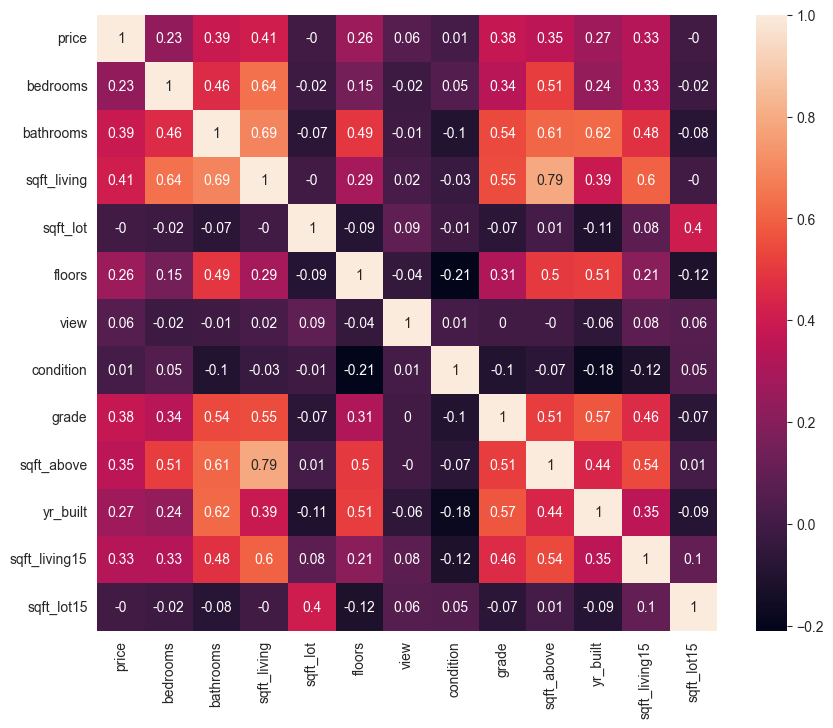

In [46]:
print('Correlation on lower prices dataset selection:')

price_corr = df_low[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 
       'sqft_living15', 'sqft_lot15']].corr().round(2)

plt.figure(figsize=(10, 8))
plot = sns.heatmap(price_corr, annot=True) #[(price_corr >= 0.3) | (price_corr <= -0.2)]

Prices has the highest positive correlation with:  
- 'sqft_living'
- 'grade'
- 'sqft_above'
- 'sqft_living15'
- 'bathrooms'.

### Plotting by groups in order to find the best values

For that I will use de dataframe with the the prices below the mean

checking the values again

In [47]:
df_low_2014 = df_low.query('year_sale == 2014')
df_low_2015 = df_low.query('year_sale == 2015')

In [48]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Histogram(name = '2014', x=df_low_2014['month_sale'],
              ),
              row=1, col=1
)
fig.add_trace(
    go.Histogram(name = '2015', x=df_low_2015['month_sale'],
              ),
              row=2, col=1
)
fig.update_layout(bargap=0.2, title='Number of available economic housing per month', height=800)
fig.update_xaxes(labelalias={
                             1:'Jan',
                             1.5:'',
                             2:'Feb',
                             2.5:'',
                             3:'March',
                             3.5:'',
                             4:'April',
                             4.5:'',
                             5:'May',
                             6:'June',
                             7:'July',
                             8 :'Aug',
                             9:'Sep',
                             10 :'Oct',
                             11:'Nov',
                             12:'Dec',
                             })

fig.show()

### Ploting the values that afect the most to the price and might be interesting for my client

In [49]:
fig = px.scatter(df_low, x='sqft_living', y='price', trendline="ols", 
                trendline_color_override='silver', template='seaborn')
fig.update_layout(title='Price vs sqft', xaxis_title_text='Living square Feet')

fig.show()


In [50]:
fig = px.scatter(df_low, x='sqft_living15', y='price', trendline="ols", 
                trendline_color_override='silver', template='seaborn')
fig.update_layout(title='Price vs sqft 15', xaxis_title_text='Square Feet 15m')

fig.show()


In [51]:
fig = px.scatter(df_low, x='sqft_above', y='price', trendline="ols", 
                trendline_color_override='silver', template='seaborn')
fig.update_layout(title='Price vs sqft above', xaxis_title_text='Square Feet above')

fig.show()


The trendline shows, that the more square feets (in all categories) the higher the price

In [52]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
        go.Histogram(
                name= 'N° of available housing',
                x=df_low['bedrooms'],
                histfunc='count', 
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='silver', line_color="black", line_width=0.3),
                opacity=0.75
                ),
        secondary_y = True
)
fig.add_trace(
        go.Histogram(
                name='Price avg', 
                x=df_low['bedrooms'], 
                y=df_low['price'],
                histfunc='avg',
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='lightcoral', line_color="black", line_width=0.3),
                ),
        secondary_y=False
),
fig.update_layout(title='Price avg and n° of available housing',
                  xaxis_title_text='Number of bedrooms', bargap=0.2)

fig.update_traces(xbins_size=1)
fig.update_yaxes(title_text="Price avg", secondary_y=False)
fig.update_yaxes(title_text="N° of housing", secondary_y=True)

fig.show()

In [53]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
        go.Histogram(
                name= 'N° of available housing',
                x=df_low['bathrooms'],
                histfunc='count', 
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='silver', line_color="black", line_width=0.3),
                opacity=0.75
                ),
        secondary_y = True
)
fig.add_trace(
        go.Histogram(
                name='Price avg', 
                x=df_low['bathrooms'], 
                y=df_low['price'],
                histfunc='avg',
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='lightcoral', line_color="black", line_width=0.3),
                ),
        secondary_y=False
),
fig.update_layout(title='Price avg and n° of available housing',
                  xaxis_title_text='Number of bathrooms', bargap=0.2)

fig.update_traces(xbins_size=1)
fig.update_yaxes(title_text="Price avg", secondary_y=False)
fig.update_yaxes(title_text="N° of housing", secondary_y=True)

fig.show()

In [54]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
        go.Histogram(
                name= 'N° of available housing',
                x=df_low['condition'],
                histfunc='count', 
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='silver', line_color="black", line_width=0.3),
                opacity=0.75
                ),
        secondary_y = True
)
fig.add_trace(
        go.Histogram(
                name='Price avg', 
                x=df_low['condition'], 
                y=df_low['price'],
                histfunc='avg',
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='lightcoral', line_color="black", line_width=0.3),
                ),
        secondary_y=False
),
fig.update_layout(title='Price avg and n° of available housing',
                  xaxis_title_text="House's condition", bargap=0.2)

fig.update_traces(xbins_size=1)
fig.update_yaxes(title_text="Price avg", secondary_y=False)
fig.update_yaxes(title_text="N° of housing", secondary_y=True)
fig.update_xaxes(labelalias={
                             1:'Poor',
                             2:'Fair',
                             3:'Avg',
                             4:'Good',
                             5:'Very Good'
                             })

fig.show()

In [55]:


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
        go.Histogram(
                name= 'N° of available housing',
                x=df_low['grade'],
                histfunc='count', 
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='silver', line_color="black", line_width=0.3),
                opacity=0.75
                ),
        secondary_y = True
)
fig.add_trace(
        go.Histogram(
                name='Price avg', 
                x=df_low['grade'], 
                y=df_low['price'],
                histfunc='avg',
                textfont_size=10,
                hovertemplate ='%{y}',
                marker= dict(color='lightcoral', line_color="black", line_width=0.3)
                ),
        secondary_y=False
),
fig.update_layout(title='Price avg and n° of available housing',
                  xaxis_title_text="House's grade", bargap=0.2, width=900)

fig.update_yaxes(title_text="Price avg", secondary_y=False)
fig.update_yaxes(title_text="N° of housing", secondary_y=True)
fig.update_xaxes(labelalias={
                             1:'Cabin',
                             2:'Substd.',
                             3:'Poor',
                             4:'Low',
                             5:'Fair',
                             6:'Low avg.',
                             7:'Avg',
                             8 :'Good',
                             9:'Better',
                             10 :'Very Good',
                             11:'Excl.',
                             12:'Lux.',
                             13:'Mansion'
                             },
                tickangle=45)
#xaxis=dict

fig.show()

Most of the houses are rated as avg. in conditions and grade.

Let's plot them together by subplotting

In [56]:

fig = make_subplots(rows=2, cols=2, shared_yaxes=True, shared_xaxes=False, 
                    subplot_titles=("Price vs No. Bedrooms", "Price vs No. bathrooms", 
                                   "Price vs house condition", "Price vs grade"))

fig.add_trace(go.Histogram(x=df_low['bedrooms'], y=df_low['price'], 
                           histfunc='avg', marker_color='lightskyblue'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_low['bathrooms'], y=df_low['price'], 
                           histfunc='avg', marker_color='purple'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_low['condition'], y=df_low['price'], 
                           histfunc='avg', marker_color='violet'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_low['grade'], y=df_low['price'], 
                           histfunc='avg', marker_color='lightcoral'), row=2, col=2)

fig.update_traces(xbins_size=1) 
fig.update_layout(bargap=0.2, height=600, width=800, 
                  title_text="Correlations between price and other values", showlegend=False)
fig.update_xaxes(type='category', categoryorder='category ascending')
fig.show()

Since my client want to invest in poor neighbirhoods, and take care of renovations taking little profit, I will filter the fair / avg. rated houses, so she doesn't has to spend much in renovations.

In [57]:
param_1 = df_low[(df_low['condition'] == 3)]
param_2 = df_low[(df_low['grade'] >=5) & (df_low['grade'] <=7)]

### Final dataset

In [58]:
final = pd.merge(param_1, param_2,  how="inner")
final.head()

house_id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0         1 2014-10-13 221900         3          1         1180      5650   
1         3 2015-02-25 180000         2          1          770     10000   
2         7 2014-06-27 257500         3       2.25         1715      6819   
3         8 2015-01-15 291850         3        1.5         1060      9711   
4         9 2015-04-15 229500         3          1         1780      7470   

   floors  waterfront  view  ...  zipcode     lat     long  sqft_living15  \
0       1           0     0  ...    98178 47.5112 -122.257           1340   
1       1           0     0  ...    98028 47.7379 -122.233           2720   
2       2           0     0  ...    98003 47.3097 -122.327           2238   
3       1           0     0  ...    98198 47.4095 -122.315           1650   
4       1           0     0  ...    98146 47.5123 -122.337           1780   

   sqft_lot15  year_sale  month_sale  month_name  day_sale  weekd_sale  
0        5650       2014          10         Oct        13           0  
1        8062       2015           2         Feb        25           2  
2        6819       2014           6         Jun        27           4  
3        9711       2015           1         Jan        15           3  
4        8113       2015           4         Apr        15           2  

[5 rows x 26 columns]

In [59]:
final[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].describe()

price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  condition  \
count    2755      2755       2755         2755      2755     2755       2755   
mean   249222    2.9804    1.64365      1417.82   9524.91  1.31325          3   
std   48548.8  0.787738   0.624036      432.291   16263.1 0.475876          0   
min     82000         1       0.75          380       572        1          3   
25%    220000         3          1         1089      5424        1          3   
50%    255000         3        1.5         1390      7500        1          3   
75%    287000         3       2.25         1700    9381.5        2          3   
max    321000         7       5.25         3320    306848        3          3   

         grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  
count     2755        2755           2755           2755        2755  
mean   6.69002     1280.58        134.305        1522.06     8968.56  
std   0.522297     392.152        270.218        365.765     14469.8  
min          5         380              0            460         659  
25%          6        1000              0           1265        5694  
50%          7        1220              0           1490        7582  
75%          7        1500              0           1740        9088  
max          7        3130           1570           3557      392040

Number of potential houses went from 21.597 down to 2768
- Avg. price: 249.462
- Avg. n° of bedrooms: ~3 (Good number for avg. size families)
- The 25 percentille of square feet lies on 1087, that's a reasonable number for a three bedroom and living room house.
- A possible downside is that most of them doesn't have a basement for storage, etc.

## We went from this map, to the next one

In [60]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="long",
    hover_name="price",
    color='price',
    #color_continuous_scale='purples',
    #color_continuous_midpoint=6,
    #range_color=(1,7),
    size='price',
    size_max= 6,
    zoom=8,
    center=dict(lat=47.50,
                lon=-122)
)
fig.update_layout(title ='Total number of houses')
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 40, "t": 50, "l": 20, "b": 20})
fig.show()

In [61]:


fig = px.scatter_mapbox(
    final,
    lat="lat",
    lon="long",
    hover_name="price",
    color='price',
    color_continuous_scale='oranges',
    size='price',
    size_max= 4,
    zoom=8,
    center=dict(lat=47.50,
                lon=-122)
)
fig.update_layout(title ='Final locations of potencial houses',
                  mapbox_style="carto-positron",
                  margin={"r": 40, "t": 50, "l": 20, "b": 20}
                  )

fig.show()

In [62]:

from matplotlib.pyplot import legend


fig = px.scatter_mapbox(
    final,
    lat="lat",
    lon="long",
    labels=None,
    hover_name="price",
    color='zipcode',
    color_continuous_scale='viridis',
    size='price',
    size_max= 4,
    zoom=8,
    center=dict(lat=47.50,
                lon=-122)
)
fig.update_traces(showlegend=False)
fig.update_layout(title='Potential houses by zipcodes', 
                  mapbox_style="carto-positron",
                  margin={"r": 40, "t": 50, "l": 20, "b": 20}
                  )
fig.show()

### Five samples of cities where look for suitable neigbourhoods to invest in:

- Kent
- Renton
- Des Moines
- White Center
- Maple Valley 